In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
#plt.rc('axes', facecolor='#FFFFFF')

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
star98_df = sm.datasets.star98.load_pandas().data
X = star98_df[['LOWINC', 'PERMINTE', 'PERHISP']]

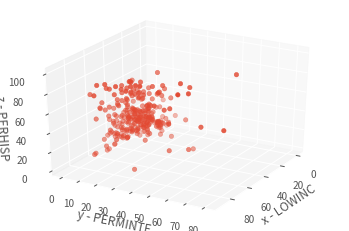

In [4]:
with plt.rc_context({'axes.facecolor': '#FFFFFF'}):

    fig = plt.figure()

    # https://matplotlib.org/mpl_toolkits/mplot3d/api.html#module-mpl_toolkits.mplot3d.axes3d
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('x - LOWINC')
    ax.set_ylabel('y - PERMINTE')
    ax.set_zlabel('z - PERHISP')

    ax.scatter(star98_df.LOWINC, star98_df.PERMINTE, star98_df.PERHISP)

    # view_init(elev=None, azim=None)
    #
    # - ‘elev’ stores the elevation angle in the z plane.
    # - ‘azim’ stores the azimuth angle in the x, y plane.
    #
    # ref: https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.view_init
    ax.view_init(30, 30)

# Factor Analysis

Describe observed variables in terms of a potentially lower number of unobserved variables called factors. 
    
$ {\begin{matrix}z_{1,i}&=&\ell _{1,1}F_{1,i}&+&\ell _{1,2}F_{2,i}&+&\ell _{1,p}F_{p,i}&+&\varepsilon _{1,i}\\\vdots &&\vdots &&\vdots &&\vdots &&\vdots\\z_{a,i}&=&\ell _{a,1}F_{1,i}&+&\ell _{a,2}F_{2,i}&+&\ell _{a,p}F_{p,i}&+&\varepsilon _{a,i}\end{matrix}} $

$ \equiv $

$ z_{ai}=\sum _{p}\ell _{ap}F_{pi}+\varepsilon _{ai} $

* $ x_{ai} $: the observed random variable of $a$-th subject (e.g., student) and $i$-th instance (e.g., question).
* $ z_{ai} $: the standardized $ x_{ai} $.
* $ F_{pi} $: the unobserved common factor, influencing all the observed random variables (e.g., mathematical intelligence).
* $ \ell_{ap} $: the factor loading.
* $ \varepsilon_{ai} $: the noise.

In matrix notation,

$ Z=LF+\epsilon $

## First Trial

In [5]:
from sklearn.decomposition import FactorAnalysis as FA

In [6]:
fa = FA(n_components=2)

In [7]:
# fit the model with X, and apply the dimensionality reduction on X
X_fa = fa.fit_transform(X)

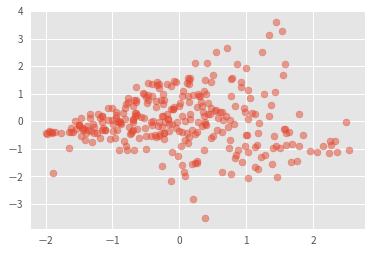

In [8]:
# [:, 0]: all rows and the first column
plt.scatter(x=X_fa[:, 0], y=X_fa[:, 1], alpha=0.5)

## Who Contributes Most? - `components_`

In [9]:
fa_comp_pd = pd.DataFrame(
    data=fa.components_,
    index=['comp_1', 'comp_2'],
    columns=['LOWINC', 'PERMINTE', 'PERHISP']
)
fa_comp_pd

,LOWINC,PERMINTE,PERHISP
comp_1,20.354360,6.571863,19.178596
comp_2,1.446514,-4.240020,-15.506578


* `components_`: the loading matrix.

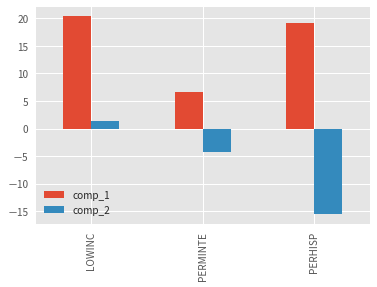

In [10]:
fa_comp_pd.T.plot.bar()

## Find the Best N Components Among the 3 Features

In [11]:
n = 3
my_X = X

In [12]:
my_fa_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_fa_score_df

In [13]:
for i in my_fa_score_df.index:
    my_pca = FA(n_components=i)
    my_pca.fit(my_X)
    my_fa_score_df.loc[i, 'score'] = my_pca.score(my_X)

In [14]:
fa_score_df_3 = my_fa_score_df
fa_score_df_3

,score
1,-12.372341
2,-12.372270
3,-12.372270


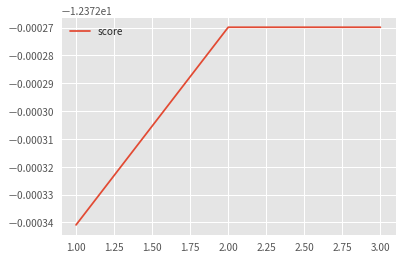

In [15]:
fa_score_df_3.plot()

## Find the Best N Components Among the All Features

In [16]:
n = 14
my_X = star98_df.iloc[:, :14]

In [17]:
my_fa_score_df = pd.DataFrame(
    data=[0]*n,
    index=list(range(1, n+1)),
    columns=['score']
)
# my_fa_score_df

In [18]:
for i in my_fa_score_df.index:
    my_pca = FA(n_components=i)
    my_pca.fit(my_X)
    my_fa_score_df.loc[i, 'score'] = my_pca.score(my_X)

In [19]:
fa_score_df_all = my_fa_score_df
fa_score_df_all

,score
1,-56.256788
2,-55.915237
3,-55.171966
4,-55.051434
5,-54.957597
6,-54.362009
7,-54.526042
8,-54.520515
9,-54.504081
10,-54.501224


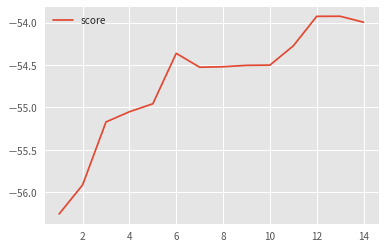

In [20]:
fa_score_df_all.plot()

## Versus Principal Component Analysis

* FA considers the noise, so it's better to handle the variances; PCA not.
* But PCA is a simple linear algebra technique, it is faster and doesn't have strong assumptions.

## Dig More

* [sklearn.decomposition.FactorAnalysis – Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis)
* [Factor analysis – Wikipedia](https://en.wikipedia.org/wiki/Factor_analysis)